In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('GlobalEconomyIndicators.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

In [5]:
# Bining the target class for classification

df['Outcome'] = pd.qcut(df[' Gross Domestic Product (GDP) '], q=3, labels=['Low', 'Medium', 'High'])

frequency = df['Outcome'].value_counts()
print(frequency)

df = df.drop(' Gross Domestic Product (GDP) ', axis = 1)

Outcome
Low       3504
Medium    3504
High      3504
Name: count, dtype: int64


# Data Cleaning

## Dealing with Missing Values

In [6]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
 CountryID                                                                                       0
 Country                                                                                         0
 Year                                                                                            0
 AMA exchange rate                                                                               0
 IMF based exchange rate                                                                         0
 Population                                                                                      0
 Currency                                                                                        0
 Per capita GNI                                                                                  0
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                            121
 Changes in inventories                                                      

As seen here, there are missing values located in several columns, we proceed by opting to replace the missing values found in 'Changes In Inventories' with the mean(since it is a continuous feature).

Now we delete the rows with missing values, found in the other columns.

df[' Changes in inventories '] = df[' Changes in inventories '].fillna(df[' Changes in inventories '].mean())
print("\n Missing values in 'Changes in inventories' column after filling with mean:" , df[' Changes in inventories '].isnull().sum())

df = df.dropna()
print("\n Missing values in each column after handling them:")
print(df.isnull().sum())


# Normalisation

In [7]:
exclude_columns = [' CountryID ',' Country ',' Currency ','Outcome'] #categorical columns
column = df.drop(columns=exclude_columns).columns.tolist() #numerical columns

range_of_columns = df[column].max() - df[column].min()
print(range_of_columns)

Year                                                                                         5.100000e+01
AMA exchange rate                                                                            1.116366e+05
IMF based exchange rate                                                                      4.200000e+04
Population                                                                                   1.425889e+09
Per capita GNI                                                                               2.342830e+05
Agriculture, hunting, forestry, fishing (ISIC A-B)                                           1.350000e+12
Changes in inventories                                                                       3.620000e+11
Construction (ISIC F)                                                                        1.240000e+12
Exports of goods and services                                                                3.531670e+12
Final consumption expenditure                 

The data found in this dataset firmly exists in ranges which demand normalization. We proceed by normalizing the values except for the 3 categorical features as noted above.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_normalize = column[1:]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

range_of_columns = df[column].max() - df[column].min()
print(range_of_columns)

Year                                                                                         51.000000
AMA exchange rate                                                                            48.727940
IMF based exchange rate                                                                      21.629805
Population                                                                                   12.494190
Per capita GNI                                                                               13.725326
Agriculture, hunting, forestry, fishing (ISIC A-B)                                           33.464260
Changes in inventories                                                                       40.529173
Construction (ISIC F)                                                                        24.872828
Exports of goods and services                                                                20.195126
Final consumption expenditure                                            

# Handling Categorical Data
## Label Encoding
We have taken the countries and converted them into a categorical value readable by the machine as well as the currency

In [9]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = [' CountryID ',' Country ',' Currency ']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
    print(df[col])

0          0
1          0
2          0
3          0
4          0
        ... 
10507    219
10508    219
10509    219
10510    219
10511    219
Name:  CountryID , Length: 10512, dtype: int64
0          0
1          0
2          0
3          0
4          0
        ... 
10507    217
10508    217
10509    217
10510    217
10511    217
Name:  Country , Length: 10512, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
10507    70
10508    70
10509    70
10510    70
10511    70
Name:  Currency , Length: 10512, dtype: int64


# Exploratory Data Analysis (EDA) and Outliers
## Plotting box plots for each numeric column


In [10]:
len(column)+3

25

CountryID                                                                                       Axes(0.125,0.83;0.352273x0.05)
Country                                                                                      Axes(0.547727,0.83;0.352273x0.05)
Year                                                                                            Axes(0.125,0.77;0.352273x0.05)
AMA exchange rate                                                                            Axes(0.547727,0.77;0.352273x0.05)
IMF based exchange rate                                                                         Axes(0.125,0.71;0.352273x0.05)
Population                                                                                   Axes(0.547727,0.71;0.352273x0.05)
Currency                                                                                        Axes(0.125,0.65;0.352273x0.05)
Per capita GNI                                                                               Axes(0.547727,0.65

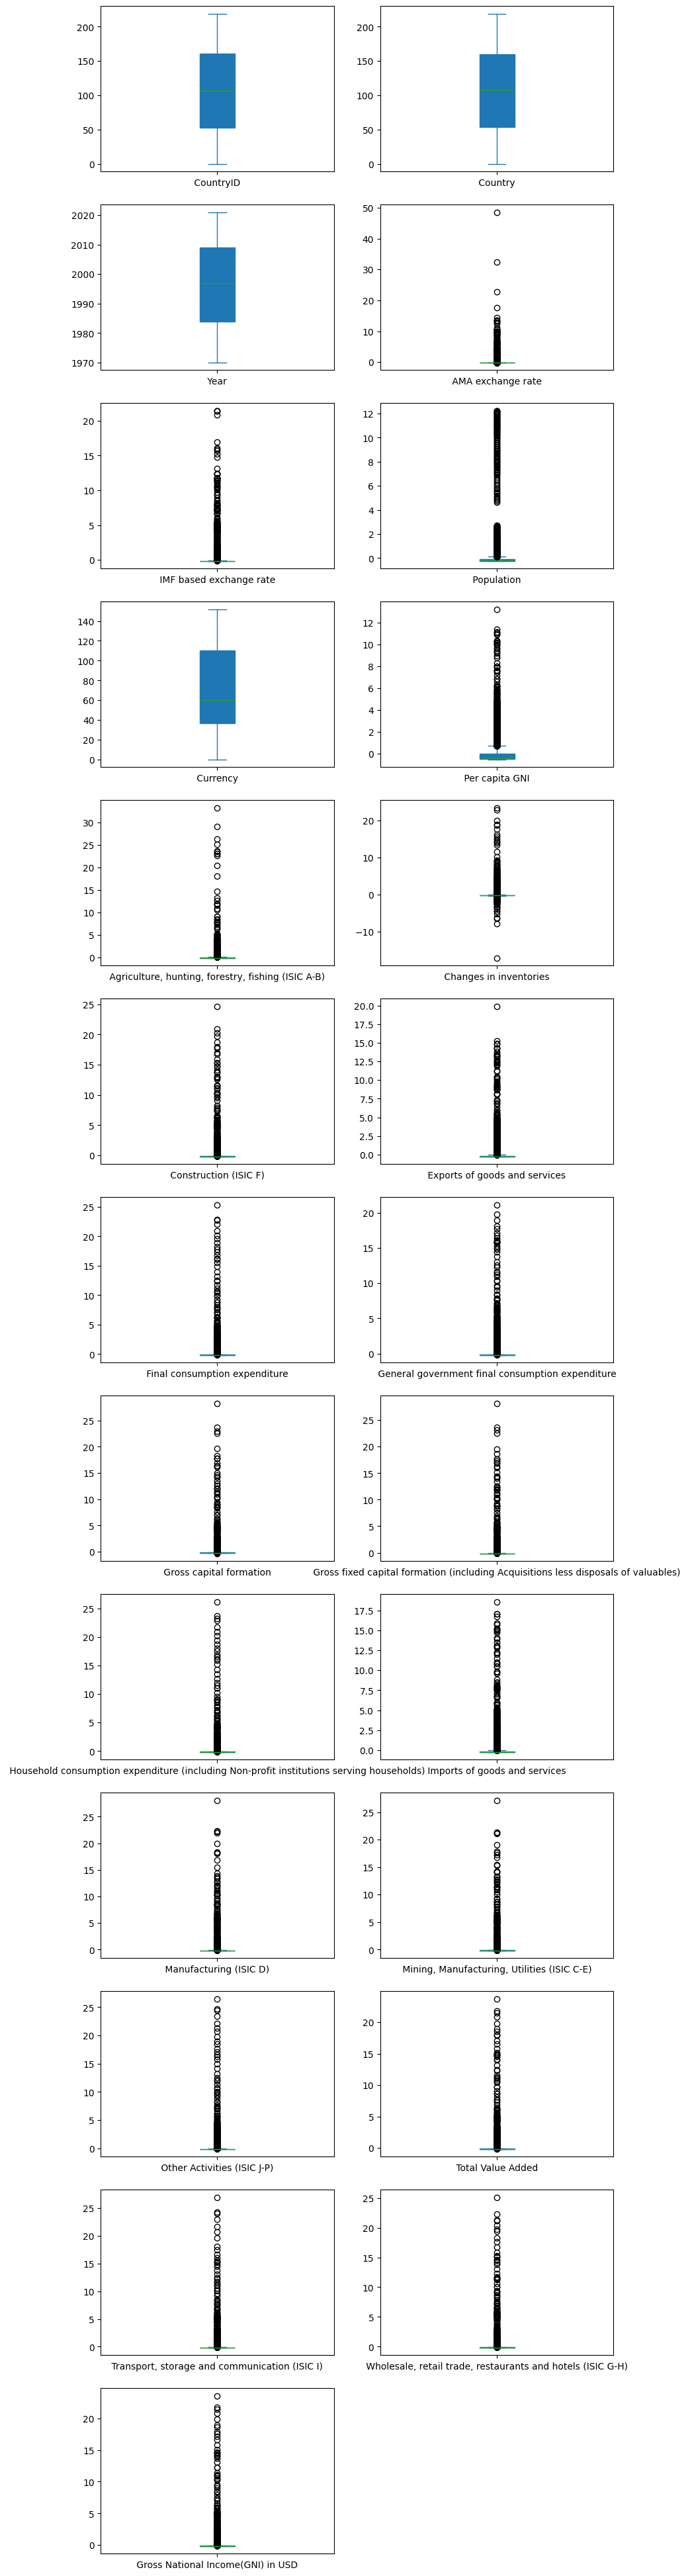

In [11]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].plot(kind='box', subplots=True, layout=(13, 2), figsize=(10, 50), patch_artist=True)

## Calculating outliers for each feature

In [12]:
for col in column:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_lower = df[col] < lower_bound
        outliers_upper = df[col] > upper_bound

        # Transform outliers by capping them at the bounds
        df.loc[outliers_lower, col] = lower_bound
        df.loc[outliers_upper, col] = upper_bound

        print(f"Column: {col}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Number of lower outliers: {outliers_lower.sum()}")
        print(f"Number of upper outliers: {outliers_upper.sum()}\n")

Column:  Year 
Lower Bound: 1946.5, Upper Bound: 2046.5
Number of lower outliers: 0
Number of upper outliers: 0

Column:  AMA exchange rate 
Lower Bound: -0.18852337282591658, Upper Bound: -0.10062682260943201
Number of lower outliers: 0
Number of upper outliers: 1916

Column:  IMF based exchange rate 
Lower Bound: -0.21196431014688188, Upper Bound: -0.11500748825343876
Number of lower outliers: 0
Number of upper outliers: 1946

Column:  Population 
Lower Bound: -0.45665611295000086, Upper Bound: 0.10958877688856455
Number of lower outliers: 0
Number of upper outliers: 1350

Column:  Per capita GNI 
Lower Bound: -1.2062050749277657, Upper Bound: 0.7237404241001171
Number of lower outliers: 0
Number of upper outliers: 1340

Column:  Agriculture, hunting, forestry, fishing (ISIC A-B) 
Lower Bound: -0.3346939332225747, Upper Bound: 0.05129760193180735
Number of lower outliers: 0
Number of upper outliers: 1415

Column:  Changes in inventories 
Lower Bound: -0.298033550988583, Upper Bound: 

/tmp/ipykernel_884601/2101343669.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1946.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_lower, col] = lower_bound


All these features have outliers in their dataset, but the amount of outliers is quite significant, since it captures a lot of nuanced data about the economics of countries, since we're looking at real world data here, the existence of a large number of outliers implies a pattern within the system that the models we run can immediately identify and fit towards. Thus we opt not to remove the outliers in the model, but we transforming them. 

CountryID                                                                                       Axes(0.125,0.83;0.352273x0.05)
Country                                                                                      Axes(0.547727,0.83;0.352273x0.05)
Year                                                                                            Axes(0.125,0.77;0.352273x0.05)
AMA exchange rate                                                                            Axes(0.547727,0.77;0.352273x0.05)
IMF based exchange rate                                                                         Axes(0.125,0.71;0.352273x0.05)
Population                                                                                   Axes(0.547727,0.71;0.352273x0.05)
Currency                                                                                        Axes(0.125,0.65;0.352273x0.05)
Per capita GNI                                                                               Axes(0.547727,0.65

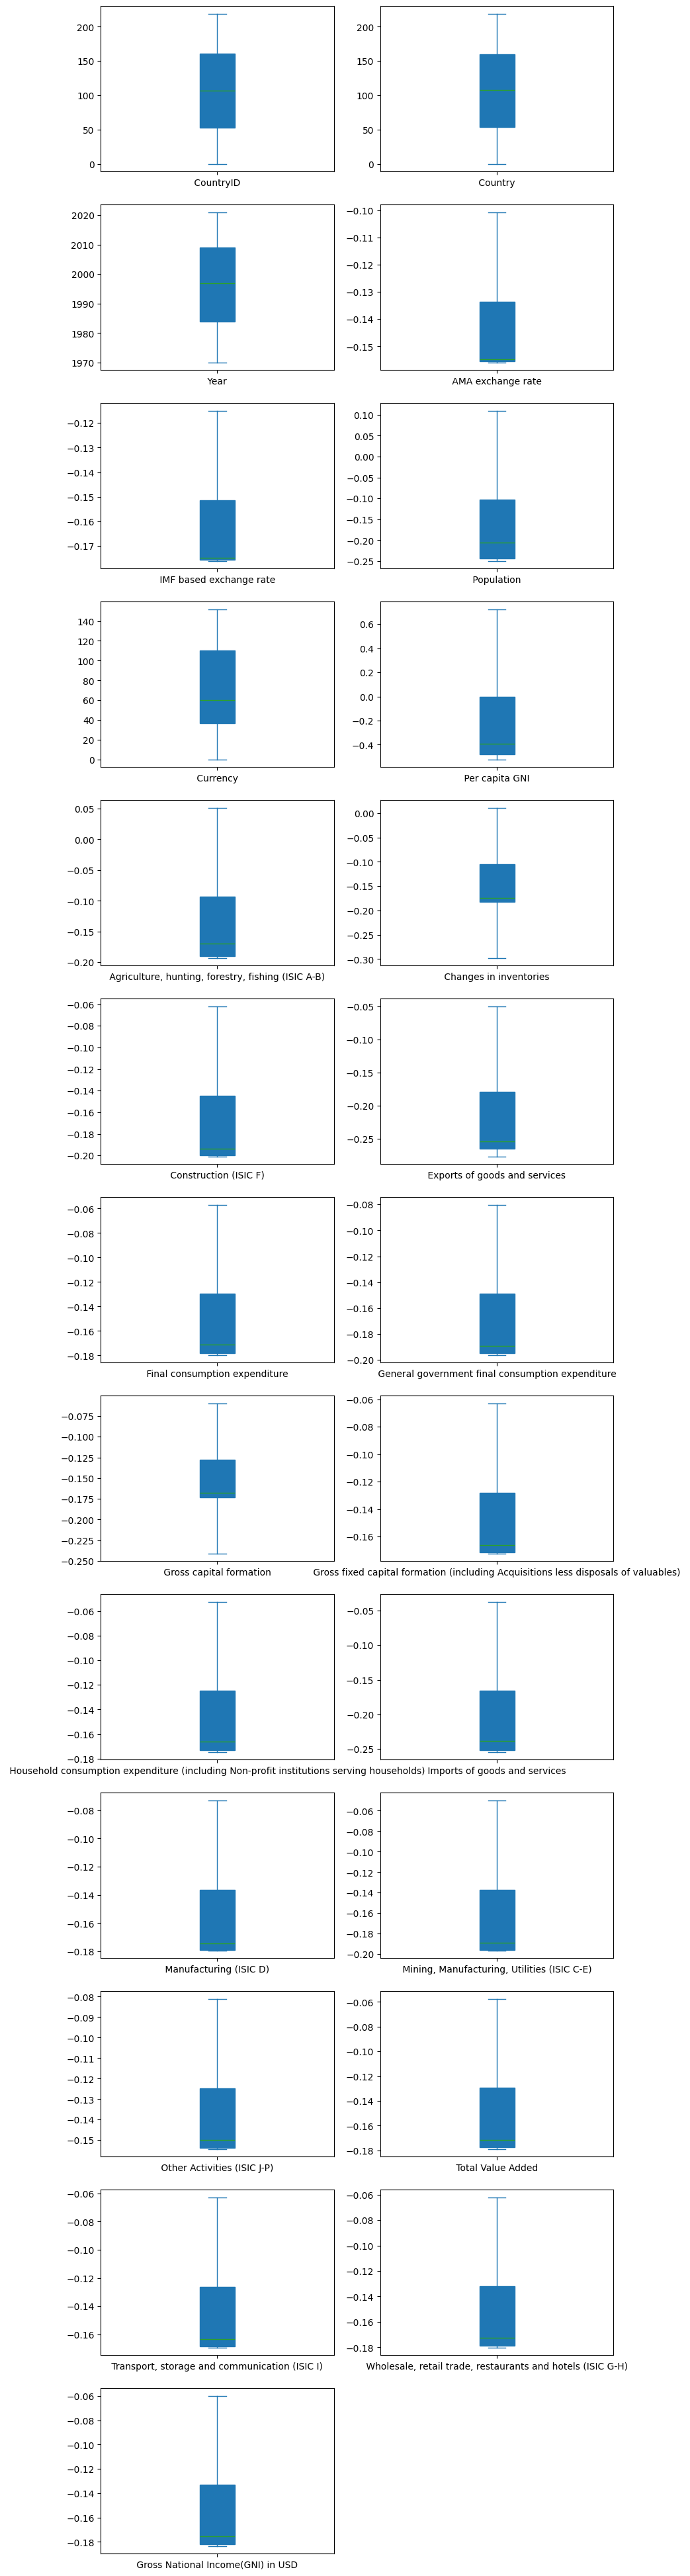

In [13]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].plot(kind='box', subplots=True, layout=(13, 2), figsize=(10, 50), patch_artist=True)

# Assignment 2

In [14]:
df.drop(columns=[' Country ',' Currency '], inplace=True, axis=1)
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 24 columns):
 #   Column                                                                                      Non-Null Count  Dtype   
---  ------                                                                                      --------------  -----   
 0    CountryID                                                                                  10512 non-null  int64   
 1    Year                                                                                       10512 non-null  float64 
 2    AMA exchange rate                                                                          10512 non-null  float64 
 3    IMF based exchange rate                                                                    10512 non-null  float64 
 4    Population                                                                                 10512 non-null  float64 
 5    Per capita GNI                 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Logistic Regression On Original Data

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)

log_reg.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

## Random Forests Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Feature Selection using Filter Methods


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

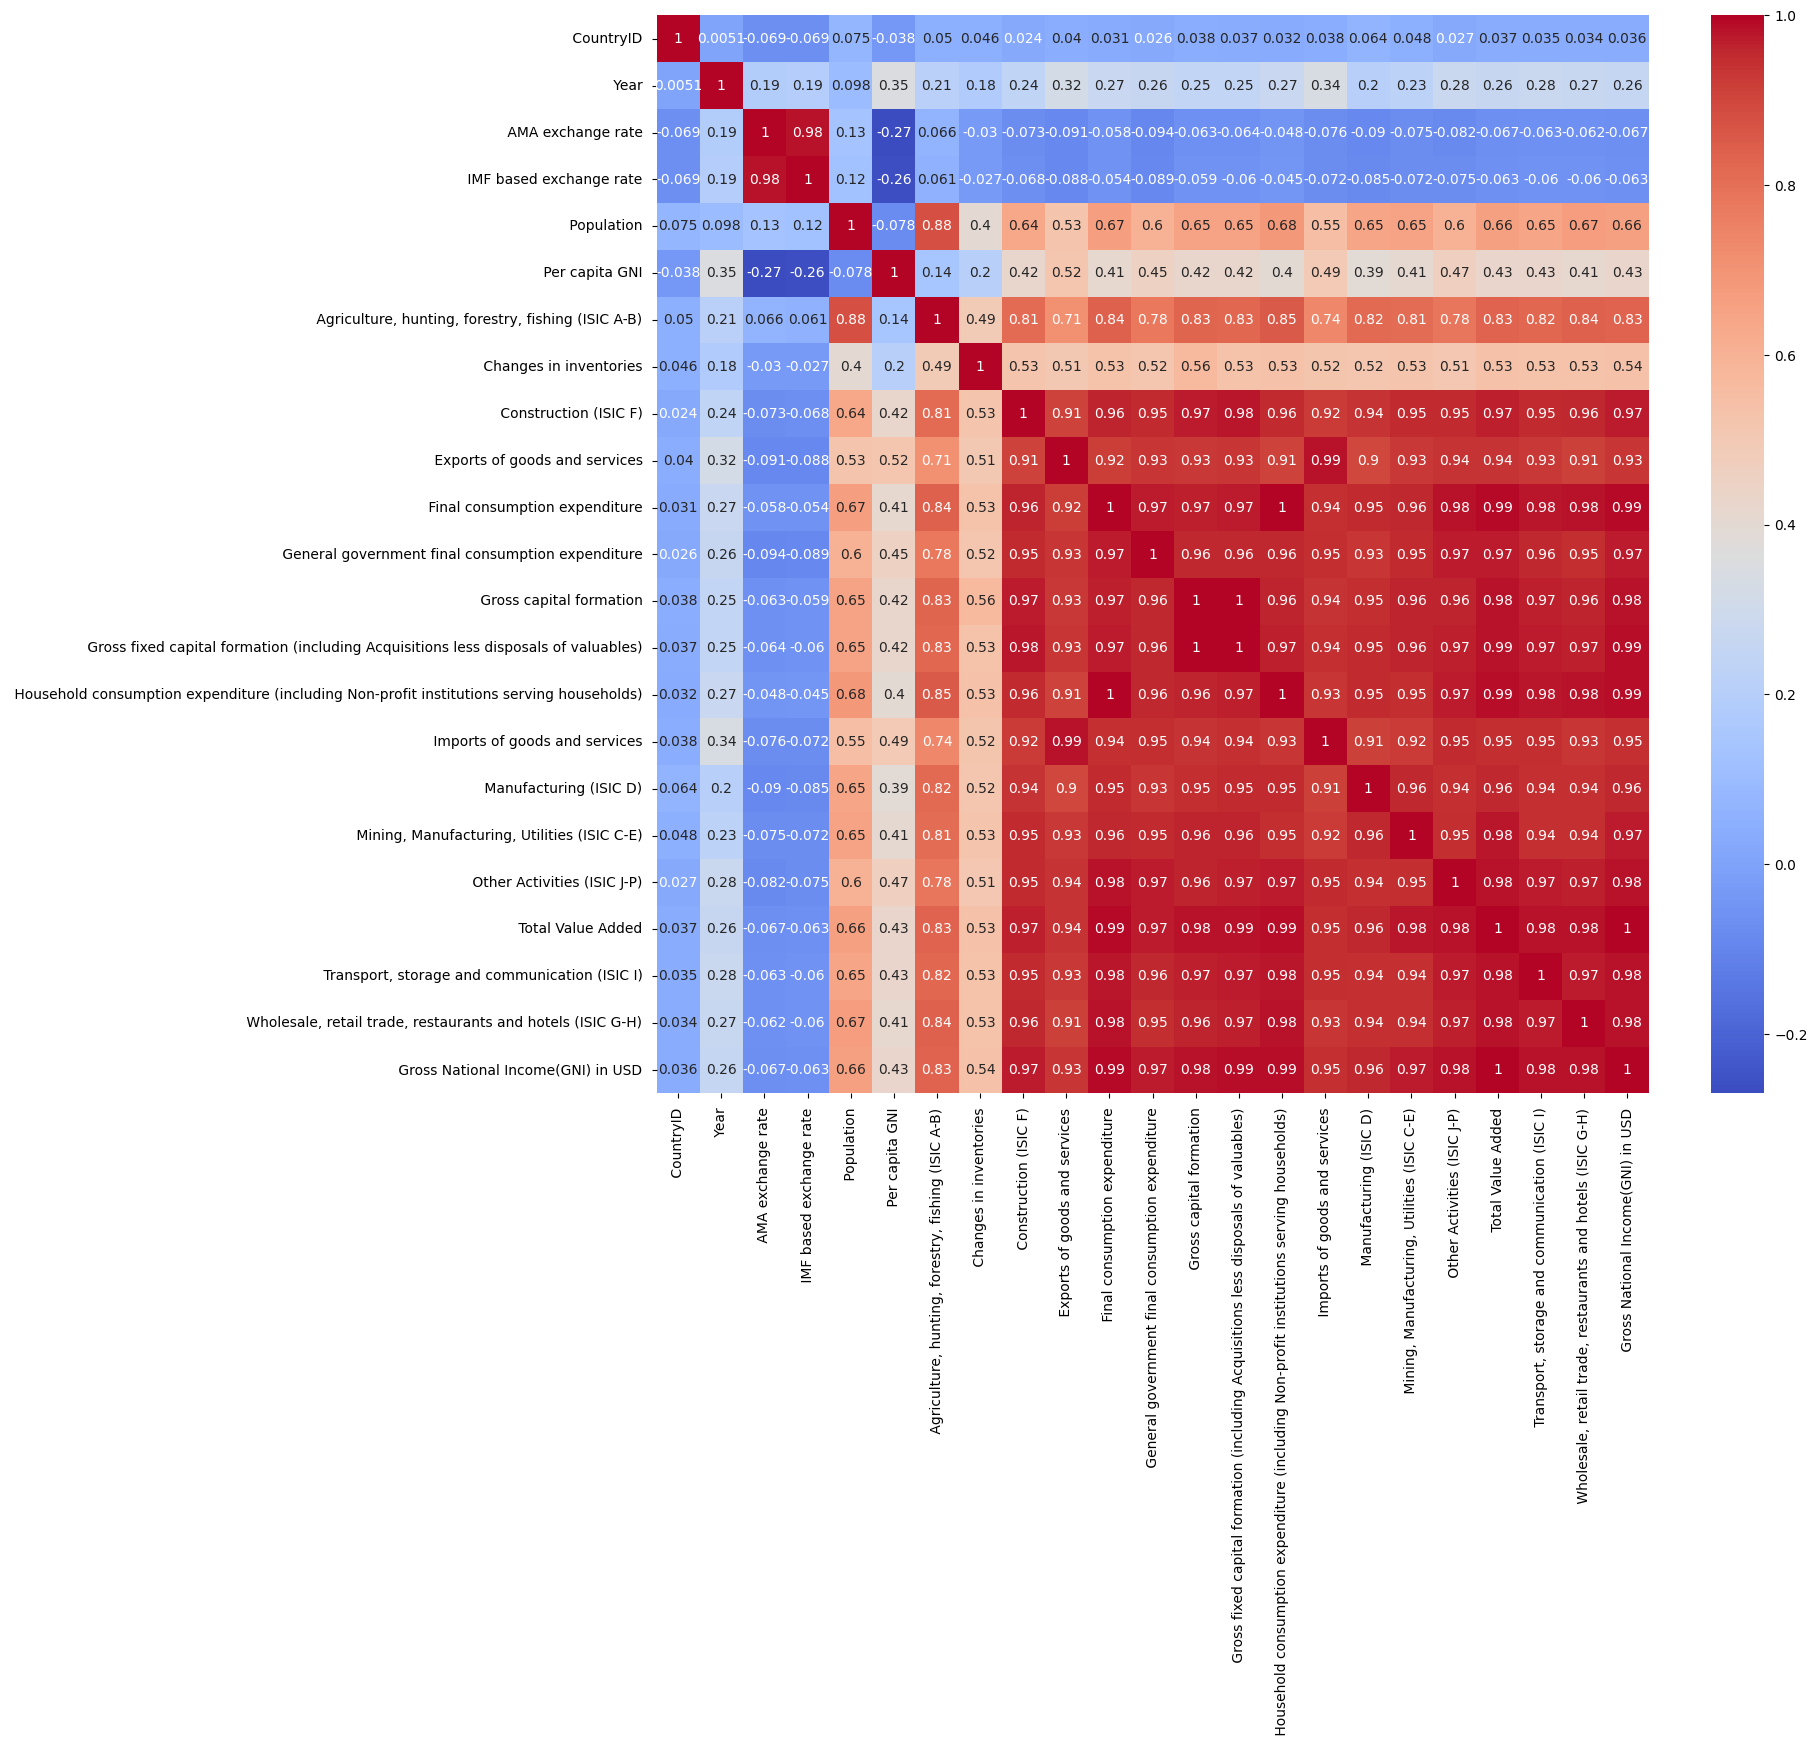

[' IMF based exchange rate ', ' Exports of goods and services ', ' Final consumption expenditure ', ' General government final consumption expenditure ', ' Gross capital formation ', ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ', ' Household consumption expenditure (including Non-profit institutions serving households) ', ' Imports of goods and services ', ' Manufacturing (ISIC D) ', ' Mining, Manufacturing, Utilities (ISIC C-E) ', ' Other Activities (ISIC J-P) ', ' Total Value Added ', ' Transport, storage and communication (ISIC I) ', ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ', ' Gross National Income(GNI) in USD ']
Number of Remaining features: 8
Remaining features: Index([' CountryID ', ' Year ', ' AMA exchange rate ', ' Population ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) '],
      dtype='object')


In [18]:
import seaborn as sns

corr_matrix = x.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

threshold = 0.9
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print(to_drop)
x1 = x.drop(columns=to_drop)

print("Number of Remaining features:", x1.columns.size)
print("Remaining features:", x1.columns)

Here we have reduced it down to 10 features, from 26

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\katip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.749878108239883
Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.82      0.84       704
         Low       0.72      0.87      0.78       644
      Medium       0.66      0.58      0.62       703

    accuracy                           0.75      2051
   macro avg       0.75      0.75      0.75      2051
weighted avg       0.75      0.75      0.75      2051



C:\Users\katip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree Classifer

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9410043881033642
Classification Report:
               precision    recall  f1-score   support

        High       0.96      0.97      0.96       704
         Low       0.94      0.95      0.95       644
      Medium       0.92      0.91      0.91       703

    accuracy                           0.94      2051
   macro avg       0.94      0.94      0.94      2051
weighted avg       0.94      0.94      0.94      2051



## Random Forests Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9731838127742565
Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.99      0.98       704
         Low       0.98      0.97      0.97       644
      Medium       0.96      0.96      0.96       703

    accuracy                           0.97      2051
   macro avg       0.97      0.97      0.97      2051
weighted avg       0.97      0.97      0.97      2051



In [26]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.34032179424670894
Classification Report:
               precision    recall  f1-score   support

        High       0.49      0.08      0.14       704
         Low       0.33      0.95      0.49       644
      Medium       0.38      0.04      0.07       703

    accuracy                           0.34      2051
   macro avg       0.40      0.36      0.23      2051
weighted avg       0.40      0.34      0.23      2051



## KNN Classifer

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.6313993174061433
Classification Report:
               precision    recall  f1-score   support

        High       0.66      0.68      0.67       704
         Low       0.61      0.70      0.65       644
      Medium       0.63      0.51      0.56       703

    accuracy                           0.63      2051
   macro avg       0.63      0.63      0.63      2051
weighted avg       0.63      0.63      0.63      2051



From this the best performing models are random forests and decision trees, which intuitively makes sense as random forests builds on top of the structure of decision trees. KNNs perform well, since the number of features we're working with pertains to country data, countries that are of a category tend to exist near each other in the 'Economy Indicators' dimensional space. Meanwhile SVMs and logistic regression models perform poorly, this might just be due to the large amount of outliers that are a part of the data.

# Feature Selection using Wrapper Methods
## Logistic Regression

In [35]:
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=200)

rfe = RFE(estimator=model, n_features_to_select=5)
x2 = rfe.fit_transform(x, y)

print("Selected features using RFE:\n", x.columns[rfe.get_support()])

C:\Users\katip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Selected features using RFE:
 Index([' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Construction (ISIC F) ', ' Exports of goods and services ',
       ' Imports of goods and services ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) '],
      dtype='object')


In [36]:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8600682593856656
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.92      0.95       704
         Low       0.74      0.99      0.85       644
      Medium       0.89      0.68      0.77       703

    accuracy                           0.86      2051
   macro avg       0.87      0.86      0.86      2051
weighted avg       0.88      0.86      0.86      2051



## Recursive Feature Elimination Using Decision Trees

In [37]:
model = DecisionTreeClassifier(random_state=42)

rfe = RFE(estimator=model, n_features_to_select=5)
x2 = rfe.fit_transform(x, y)

print("Selected features using RFE:\n", x.columns[rfe.get_support()])


Selected features using RFE:
 Index([' Changes in inventories ', ' Exports of goods and services ',
       ' Manufacturing (ISIC D) ', ' Total Value Added ',
       ' Gross National Income(GNI) in USD '],
      dtype='object')


In [38]:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9834227206240859
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99       704
         Low       0.97      0.99      0.98       644
      Medium       0.99      0.96      0.98       703

    accuracy                           0.98      2051
   macro avg       0.98      0.98      0.98      2051
weighted avg       0.98      0.98      0.98      2051



## Random Forests

In [39]:
model = RandomForestClassifier()

rfe = RFE(estimator=model, n_features_to_select=5)
x2 = rfe.fit_transform(x, y)

print("Selected features using RFE:\n", x.columns[rfe.get_support()])

Selected features using RFE:
 Index([' Final consumption expenditure ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Total Value Added ', ' Gross National Income(GNI) in USD '],
      dtype='object')


In [40]:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9878108239882983
Classification Report:
               precision    recall  f1-score   support

        High       0.99      1.00      1.00       704
         Low       0.98      0.99      0.99       644
      Medium       0.99      0.97      0.98       703

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051



## SVMs

In [41]:
svm_model = SVC(kernel='linear')
rfe_svm = RFE(estimator=svm_model, n_features_to_select=5)
x2 = rfe_svm.fit_transform(x, y)

print("Selected features using RFE with SVM:\n", x.columns[rfe_svm.get_support()])


Selected features using RFE with SVM:
 Index([' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Construction (ISIC F) ', ' Exports of goods and services ',
       ' Imports of goods and services ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) '],
      dtype='object')


In [42]:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.855680156021453
Classification Report for SVM:
               precision    recall  f1-score   support

        High       0.99      0.93      0.96       704
         Low       0.73      1.00      0.84       644
      Medium       0.90      0.65      0.75       703

    accuracy                           0.86      2051
   macro avg       0.87      0.86      0.85      2051
weighted avg       0.88      0.86      0.85      2051



## KNN Classifier

In [44]:
knn_model = KNeighborsClassifier()

rfe_knn = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)  # RFE requires an estimator that has a 'feature_importances_' or 'coef_' attribute
x2_knn = rfe_knn.fit_transform(x, y)

print("Selected features using RFE with KNN:\n", x.columns[rfe_knn.get_support()])


Selected features using RFE with KNN:
 Index([' Final consumption expenditure ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Total Value Added ', ' Gross National Income(GNI) in USD '],
      dtype='object')


In [46]:
X_train, X_test, y_train, y_test = train_test_split(x2_knn, y, test_size=0.2, random_state=42)

# Training KNN model
knn_model.fit(X_train, y_train)

# Making predictions
y_pred = knn_model.predict(X_test)

# Evaluating the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for KNN:\n", classification_report(y_test, y_pred))


KNN Accuracy: 0.9839102876645539
Classification Report for KNN:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99       704
         Low       0.98      0.98      0.98       644
      Medium       0.98      0.97      0.98       703

    accuracy                           0.98      2051
   macro avg       0.98      0.98      0.98      2051
weighted avg       0.98      0.98      0.98      2051



# Feature Reduction

In [48]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

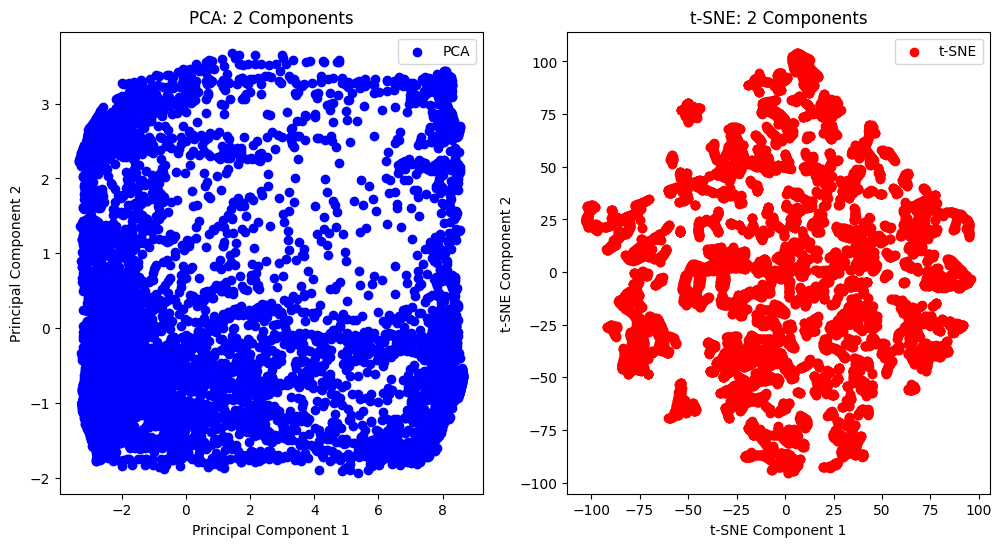

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# 1. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the reduced data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# PCA visualization
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='PCA')
ax1.set_title('PCA: 2 Components')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.legend()

# t-SNE visualization
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c='red', label='t-SNE')
ax2.set_title('t-SNE: 2 Components')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.legend()

plt.show()


 ## PCA 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [53]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9234519746465139
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.98      0.99       704
         Low       0.88      0.91      0.90       644
      Medium       0.90      0.88      0.89       703

    accuracy                           0.92      2051
   macro avg       0.92      0.92      0.92      2051
weighted avg       0.92      0.92      0.92      2051



In [54]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9137006338371526
Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.98      0.98       704
         Low       0.88      0.89      0.88       644
      Medium       0.88      0.87      0.87       703

    accuracy                           0.91      2051
   macro avg       0.91      0.91      0.91      2051
weighted avg       0.91      0.91      0.91      2051



In [55]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.923939541686982
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.98      0.99       704
         Low       0.88      0.91      0.89       644
      Medium       0.90      0.88      0.89       703

    accuracy                           0.92      2051
   macro avg       0.92      0.92      0.92      2051
weighted avg       0.92      0.92      0.92      2051



In [56]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9219892735251097
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.98      0.99       704
         Low       0.87      0.92      0.89       644
      Medium       0.90      0.87      0.88       703

    accuracy                           0.92      2051
   macro avg       0.92      0.92      0.92      2051
weighted avg       0.92      0.92      0.92      2051



In [57]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9258898098488543
Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.98      0.98       704
         Low       0.90      0.90      0.90       644
      Medium       0.89      0.89      0.89       703

    accuracy                           0.93      2051
   macro avg       0.93      0.93      0.93      2051
weighted avg       0.93      0.93      0.93      2051



## t-SNE

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

In [60]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6918576304241834
Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.88      0.86       704
         Low       0.64      0.63      0.63       644
      Medium       0.57      0.56      0.57       703

    accuracy                           0.69      2051
   macro avg       0.69      0.69      0.69      2051
weighted avg       0.69      0.69      0.69      2051



In [61]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9527059970745978
Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.98      0.98       704
         Low       0.95      0.94      0.95       644
      Medium       0.93      0.93      0.93       703

    accuracy                           0.95      2051
   macro avg       0.95      0.95      0.95      2051
weighted avg       0.95      0.95      0.95      2051



In [62]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.961482203803023
Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.99      0.99       704
         Low       0.95      0.95      0.95       644
      Medium       0.94      0.94      0.94       703

    accuracy                           0.96      2051
   macro avg       0.96      0.96      0.96      2051
weighted avg       0.96      0.96      0.96      2051



In [63]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7898586055582643
Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.92      0.94       704
         Low       0.68      0.90      0.77       644
      Medium       0.77      0.56      0.65       703

    accuracy                           0.79      2051
   macro avg       0.80      0.79      0.78      2051
weighted avg       0.80      0.79      0.78      2051



In [64]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9551438322769381
Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.99      0.98       704
         Low       0.96      0.95      0.95       644
      Medium       0.94      0.93      0.93       703

    accuracy                           0.96      2051
   macro avg       0.96      0.95      0.96      2051
weighted avg       0.96      0.96      0.96      2051



# Final Analysis
We see that for:
1. Logistic Regression - The wrapper methods work best
2. Decision Trees - Similar results are obtained upon feature elimination and the original data.
3. Random Forests - Wrapper methods perform marginally better.
4. KNN Classifier - Surprisingly, KNNs perform extremely better upon RFE.

From the results obtained, the best performing models are random forests and decision trees, which intuitively makes sense as random forests builds on top of the structure of decision trees. KNNs perform well, since the number of features we're working with pertains to country data, countries that are of a category tend to exist near each other in the 'Economy Indicators' dimensional space. Meanwhile SVMs and logistic regression models perform poorly, this might just be due to the large amount of outliers that are a part of the data.

# Feature Reduction Analysis
Logistic Regresion - PCA works better compared to t-SNE
Decision Tree Classifier - t-SNE works better compared to PCA
Random Forest Classifier - t-SNE works better compared to PCA
SVM - PCA works significantly better compared to PCA
KNN - t-SNE works better